In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
print(train['datetime'][100])
print(train['datetime'][100].split())
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[1])

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [10]:
print(train['datetime'][100].split()[0].split('-'))
print(train['datetime'][100].split()[0].split('-')[0])
print(train['datetime'][100].split()[0].split('-')[1])
print(train['datetime'][100].split()[0].split('-')[2])

['2011', '01', '05']
2011
01
05


In [11]:
# 날짜 피처 생성
train['date']= train['datetime'].apply(lambda x: x.split()[0])
train['date']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: date, Length: 10886, dtype: object

In [12]:
# 연도, 월 일, 시 분, 초 피처 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month']= train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day']= train['datetime'].apply(lambda x: x.split()[0].split('-')[2])

In [13]:
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute']=train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second']= train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


In [15]:
from datetime import datetime
import calendar

In [16]:
# 날짜
print(train['date'][99])
# datetime 타입으로 변환
print(datetime.strptime(train['date'][99], '%Y-%m-%d'))
# 정수로 요일 변환
print(datetime.strptime(train['date'][99], '%Y-%m-%d').weekday())
# 문자열로 변환
print(calendar.day_name[datetime.strptime(train['date'][99], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [17]:
train['weekday'] = train['date'].apply(lambda data:
                                      calendar.day_name[datetime.strptime(data, "%Y-%m-%d").weekday()])

In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [19]:
train['season'] = train['season'].map({1:'Spring',
                                      2:'Summer',
                                      3:'Fall',
                                      4:'Winter'})
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [21]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

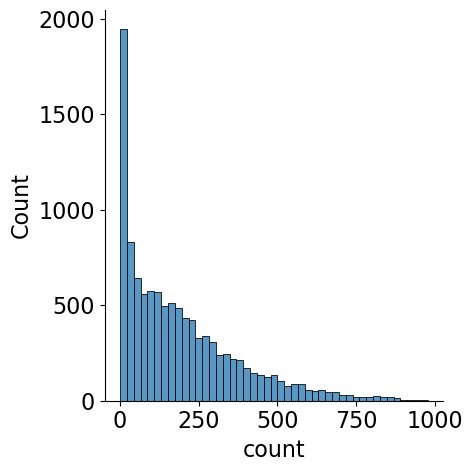

In [22]:
mpl.rc('font', size=16)
sns.displot(train['count'])

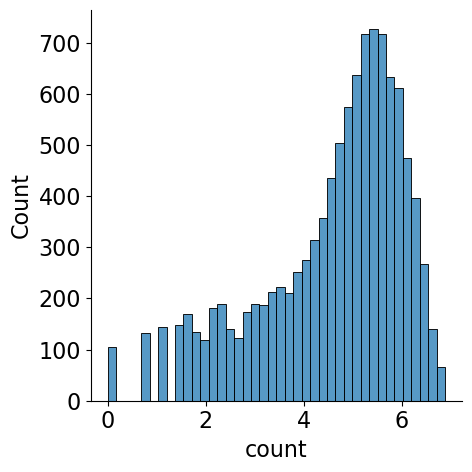

In [23]:
sns.displot(np.log(train['count']))

## 막대 그래프

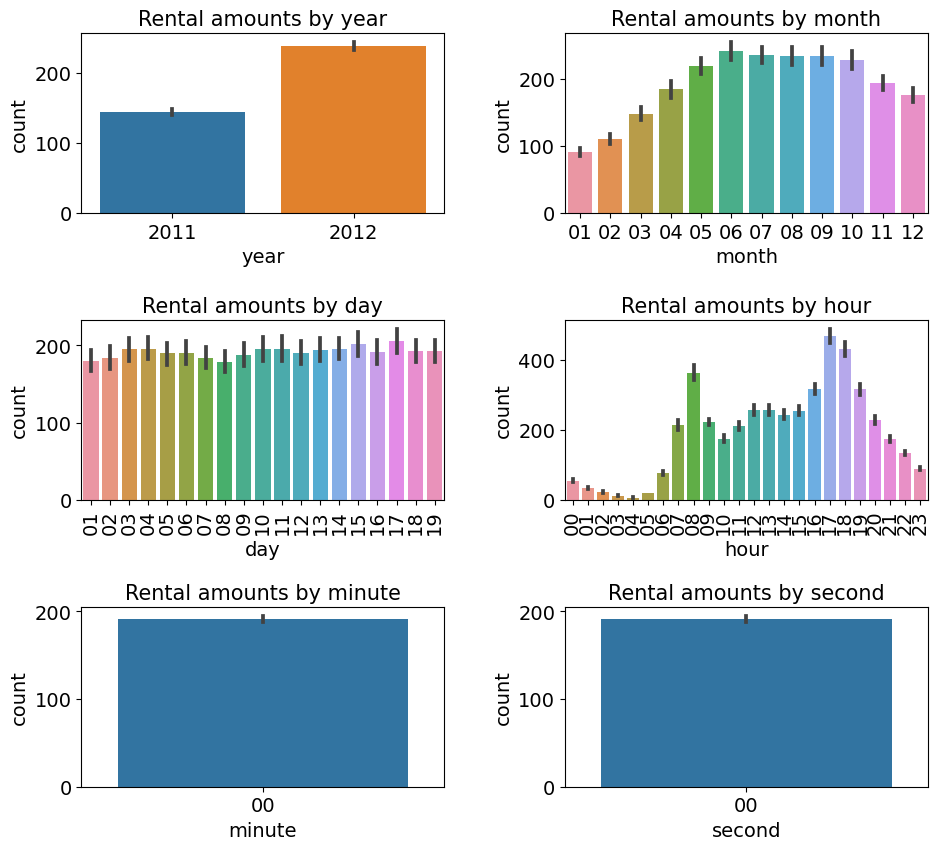

In [24]:
# 스텝 1: m행 n열 Figure 준비
# 폰트 크기 설정
mpl.rc('font', size=14)
# 각 축의 제목 크기 설정
mpl.rc('axes', titlesize=15)
# 3행 2열 Fighure 생성
figure, axes = plt.subplots(3,2)
# 그래프 사이에 여백 확보
plt.tight_layout()
# 전체 Figure 크기를 10x9 인치로 설정
figure.set_size_inches(10, 9)

# 스텝 2: 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

# 스텝 3: 세부 설정
# 3-1 : 서브 플롯 제목 달기
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
# (회전 하지않을 경우 숫자가 겹침)
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

### [0,0] -> 2012년에 더 많이 이용
### [0,1] -> 4~ 11월 이용량이 많음
### [1,0] -> 일짜는 크게 상관없이 일정한 편 -> ☞ 제거
### [1,1] -> 오전 8시, 17~19시 높은 대여율 -> 출퇴근 시간에 대여를 많이하는 편
### [2,0],[2,1] -> 분 / 초 는 count에 영향을 미치지 않음 즉, 정보가 없음 -> 제거

## 박스플롯

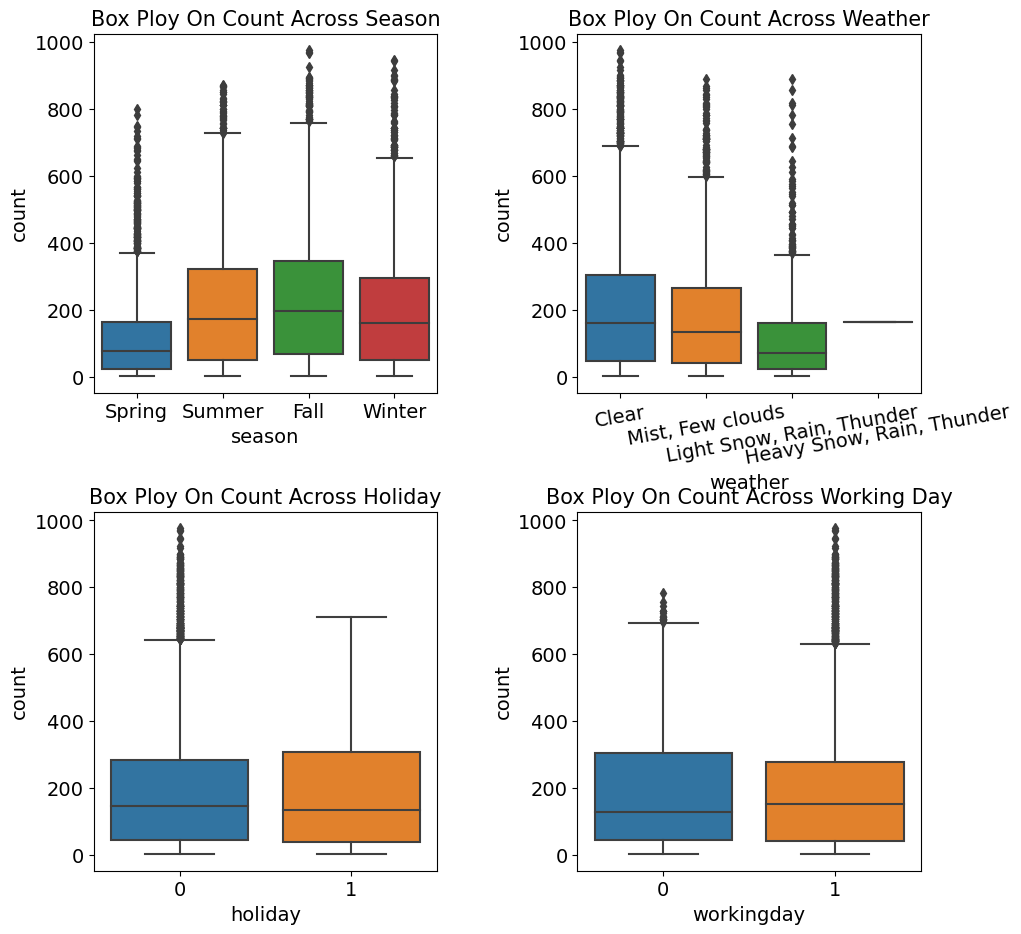

In [25]:
# 스텝1 : m행 n열 Figure 준비
# 2행 2열
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

# 스텝2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

# 스텝3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0,0].set(title='Box Ploy On Count Across Season')
axes[0,1].set(title='Box Ploy On Count Across Weather')
axes[1,0].set(title='Box Ploy On Count Across Holiday')
axes[1,1].set(title='Box Ploy On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0,1].tick_params('x', labelrotation=10)

### [0,0] 봄이 가장 적고 가을이 가장 많이 빌림
### [0,1] 맑은 날씨 가장 많음. 폭우 폭설은 대여 수량 거의 없음
### [1,0] 공휴일 일때 아닐때 자전거 대여 수량의 중앙값은 거의 비슷 하지만, 공휴일 아닐때 (0) 이상치(outlier)가 많음
### [1,1] 근무일일때 이상치가 많음 [1,0]과 비슷함

## 포인트 플롯

<AxesSubplot:xlabel='hour', ylabel='count'>

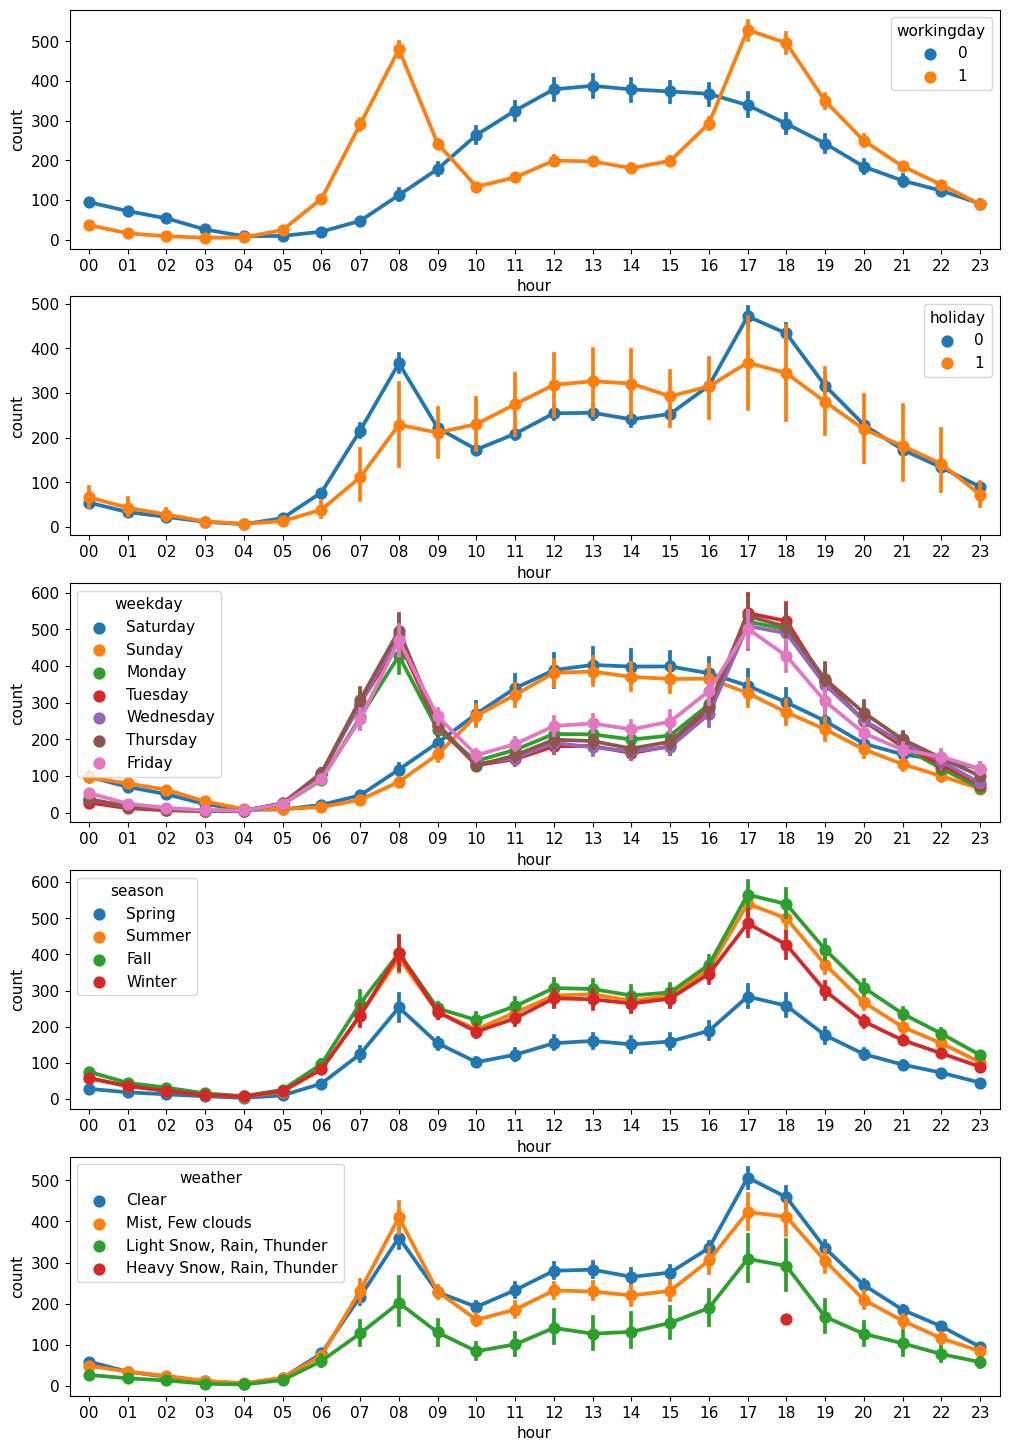

In [26]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)

figure.set_size_inches(12,18)

# 스텝 2 : 서브플롯 할당
# 근무일,공휴일, 요일, 계절, 날씨에따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])


### [0] workingday 일 경우 출근 시간 7~9시, 17~18시 쯤에 이용량이 많다.
### [1] holiday일 경우 [0]과 비슷한 결과 나타남
### [2] 요일별 그래프로, 월~금요일은 출근시간 대여량이 많으며, [0]과 비슷한 그래프를 나타낸다.
### [3] 대여의 경우 가을이 가장 많고, 봄이 가장 작다
### [4] 날씨가 좋을경우 대여가 많이 된다. 하지만 Heavy Snow, Rain, Thunder 일경우 18싱] 대여가 있는데, 이상치로 판단하고, 제거를 고려해야함

## 회귀선을 포함한 산점도 그래프

<AxesSubplot:xlabel='humidity', ylabel='count'>

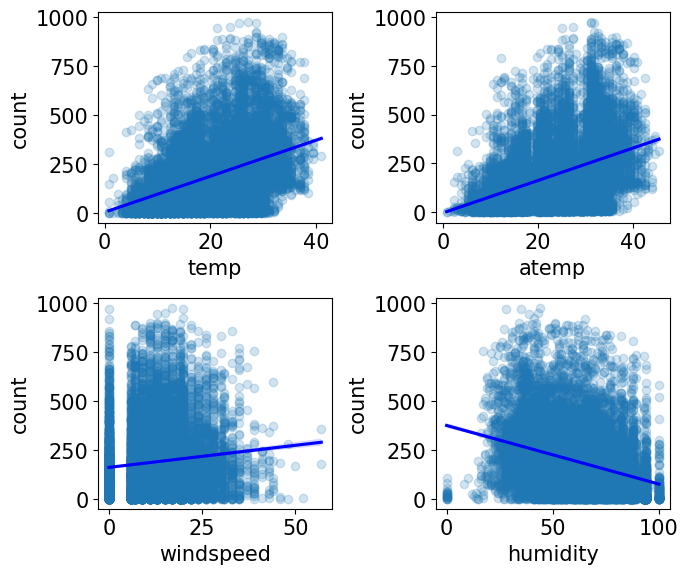

In [31]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size = 15)
figure, axes = plt.subplots(2,2)
plt.tight_layout()
figure.set_size_inches(7,6)

# 스텝 2: 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0,0],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})

## 히트맵

In [28]:
train[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

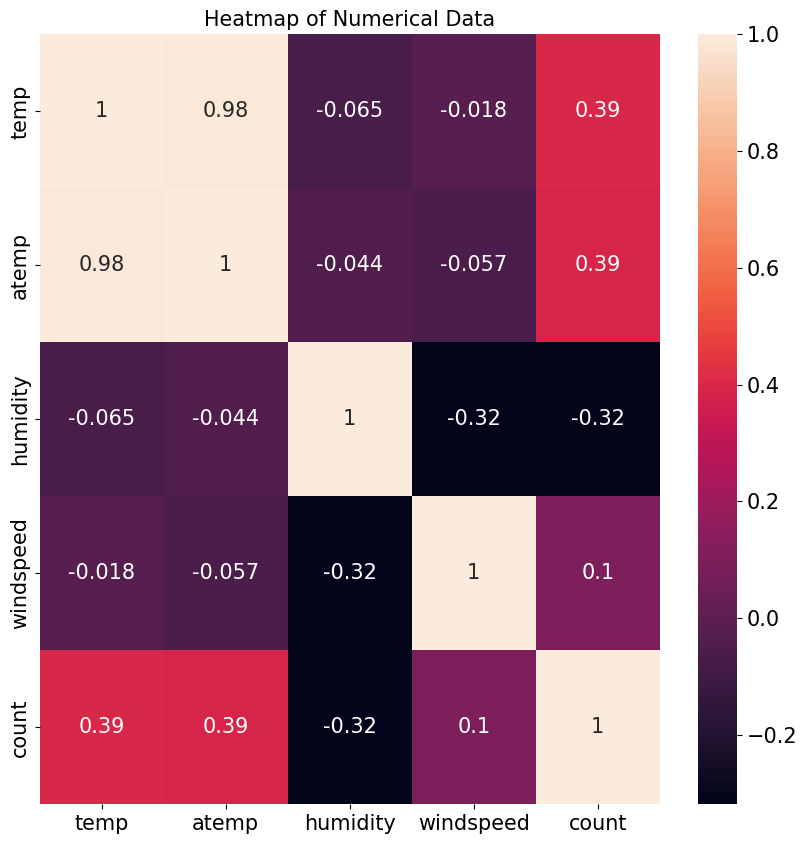

In [29]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# 상관 관계 히트맵
sns.heatmap(corrMat, annot = True)
ax.set(title='Heatmap of Numerical Data')

# windspeed의 경우 상관관계가 0.1로 낮은 상관관계 보임. 피처 제거